In [122]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [123]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)

In [124]:
clf = LogisticRegression()
clf.fit(X_train_1,Y_train_1)

LogisticRegression()

In [125]:
clf.predict(X_test_1)- Y_test_1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [126]:
clf.score(X_test_1, Y_test_1)

0.9666666666666667

In [127]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
clf.fit(X_train_1,Y_train_1)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

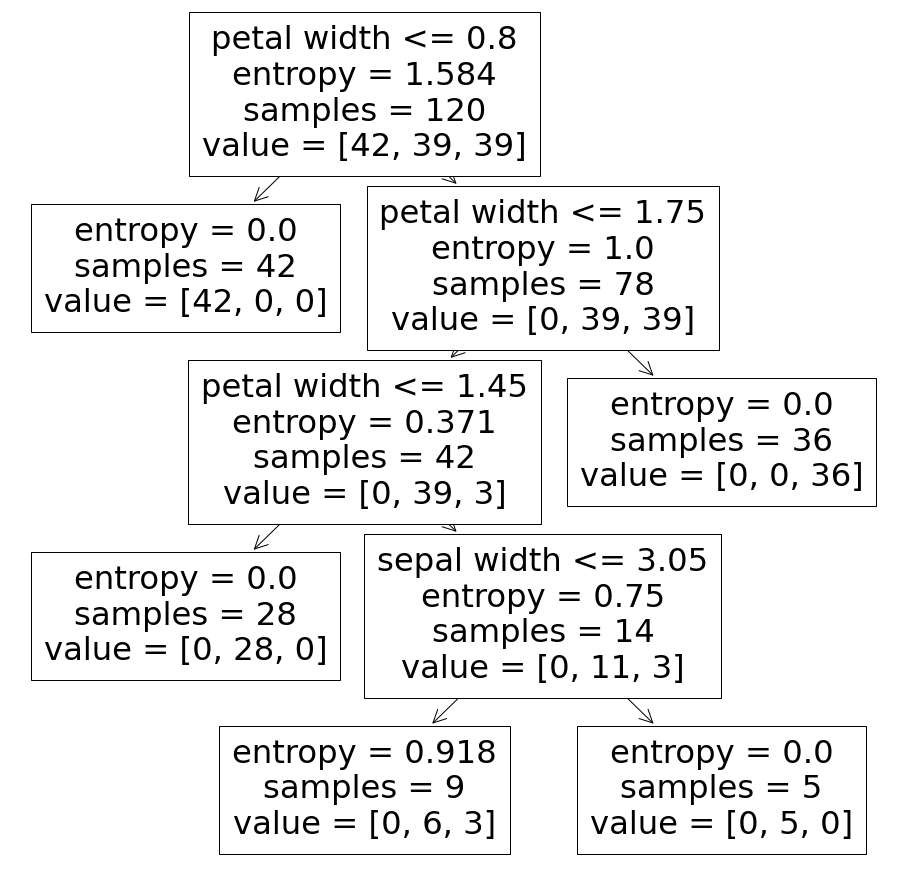

In [128]:
fig, ax = plt.subplots(figsize=(16, 16))
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [130]:
clf = LinearDiscriminantAnalysis()

In [131]:
clf.fit(X_train_1,Y_train_1)

LinearDiscriminantAnalysis()

In [132]:
clf.score(X_test_1, Y_test_1)

0.9333333333333333

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
y_true=Y_test_1
y_pred=clf.predict(X_test_1)

In [135]:
confusion_matrix(y_true, y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])

Select best parameters of Decision Tree

[0 1 1 0 1 0 0 2 0 2 2 1 0 0 1 2 1 2 2 0 2 0 0 0 0 1 1 1 1 2 1 2 2 1 0 1 0
 1 2 1 2 1 2 1 1 1 2 1 0 2 0 0 1 0 0 2 1 0 2 0 2 1 0 0 2 1 1 0 0 2 1 1 0 1
 2 1 0 1 2 2 2 2 0 0 1 2 0 1 0 0 2 1 2 0 2 0 2 0 1 0 2 2 0 2 2 2 1 0 1 0 0
 1 2 0 2 0 1 2 2 1]
sm_cv_scores_mean=array([0.66666667, 0.96666667, 0.95833333, 0.95833333, 0.95      ,
       0.95833333, 0.95833333, 0.95      , 0.95833333, 0.95      ,
       0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95      ,
       0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95      ,
       0.95833333, 0.95      , 0.95833333, 0.95      ])
sm_cv_scores_std=array([0.        , 0.03118048, 0.02635231, 0.02635231, 0.04082483,
       0.02635231, 0.02635231, 0.04082483, 0.02635231, 0.04082483,
       0.02635231, 0.02635231, 0.02635231, 0.02635231, 0.04082483,
       0.02635231, 0.02635231, 0.02635231, 0.02635231, 0.04082483,
       0.02635231, 0.04082483, 0.02635231, 0.04082483])
sm_accuracy_scores=array([0.675     , 0.975     , 0.98333333, 0.99166667

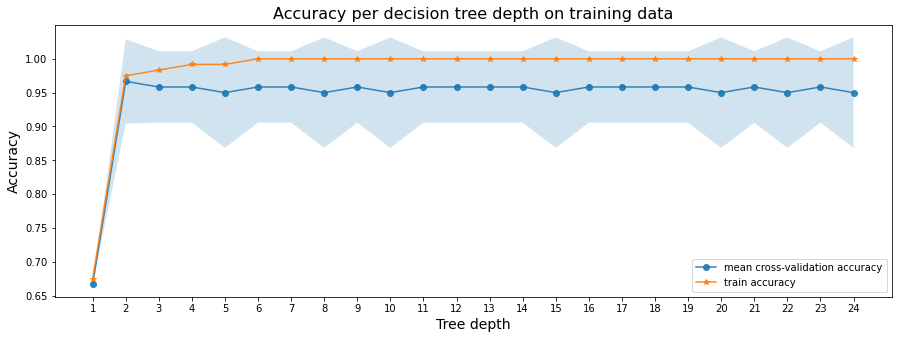

In [136]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        tree_model.fit(X, y)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(y_train)
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)
print(f"{sm_cv_scores_mean=}\n{sm_cv_scores_std=}\n{sm_accuracy_scores=}")

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')